# Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).

#### Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия.


Для построения такого датасета, нам необходимо сделать так, чтобы классы было легко разделить прямой линией, но при этом расстояние между соседями этих классов было быльше, чем до представителей другого класса. Этого можно дабиться тем, что зададим распределение элементов линейной функцией.

In [212]:
import random
import pandas as pd
import warnings
import math
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline 

In [554]:
xs = []
ys = []
target = []

for num in range(1, 31, 3):
    ys += [2 * num, 2 * num + 2]
    xs += [num + 3, num]
    target += [1, 0]

In [555]:
X = pd.DataFrame({'X':xs,
                  'Y':ys})
y = pd.DataFrame({'Class':target})

In [680]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [681]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

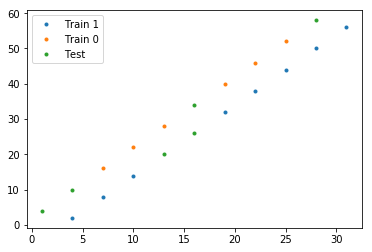

In [682]:
plt.plot(list(train.X[train.Class == 1]),
         list(train.Y[train.Class == 1]),
         '.',
         label='Train 1')
plt.plot(list(train.X[train.Class == 0]),
         list(train.Y[train.Class == 0]), 
         '.',
         label='Train 0')
plt.plot(list(test.X),
         list(test.Y), 
         '.',
         label='Test')
plt.legend()
plt.show()

In [683]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [684]:
KNC = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
LR = LogisticRegression()

In [685]:
KNC = KNeighborsClassifier()
KNC.fit(X=X_train,y=y_train)
cv_scores_KNC = cross_val_score(KNC, X, y, cv=5)
print('KNeighborsClassifier\n'\
      'Score: {}\n'\
      'CV-Score: {} (+/- {})'.format(KNC.score(X_test, y_test),
                                     cv_scores_KNC.mean(),
                                     cv_scores_KNC.std() * 2))

KNeighborsClassifier
Score: 0.3333333333333333
CV-Score: 0.8 (+/- 0.4898979485566356)


In [686]:
LR = LogisticRegression()
LR.fit(X=X_train,y=y_train)
cv_scores_LR = cross_val_score(LR, X, y, cv=5)
print('LogisticRegression\n'\
      'Score: {}\n'\
      'CV-Score: {} (+/- {})'.format(LR.score(X_test, y_test),
                                     cv_scores_LR.mean(),
                                     cv_scores_LR.std() * 2))

LogisticRegression
Score: 1.0
CV-Score: 1.0 (+/- 0.0)


_______

#### Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

Для этой задачи, нам необходимо сделать наоборот. Надо сделать такой датасет, который будет сложно поделить линейно, но при этом представители одного класса должны быть относительно близко, иначе метод ближайших соседей будет не сильно эффективен (Например для make_circles(noise=0.1, factor=0.9)).

In [739]:
from sklearn.datasets import make_circles

In [745]:
x_s, y_s = make_circles(noise=0.1, factor=0.2)

In [746]:
X_circles = pd.DataFrame(x_s)
y_circles = pd.DataFrame({'Target':y_s})

X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.3)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

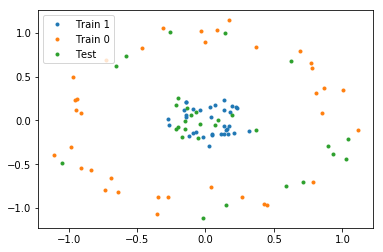

In [747]:
plt.plot(list(train[0][train.Target == 1]),
         list(train[1][train.Target == 1]),
         '.',
         label='Train 1')
plt.plot(list(train[0][train.Target == 0]),
         list(train[1][train.Target == 0]), 
         '.',
         label='Train 0')
plt.plot(list(test[0]),
         list(test[1]), 
         '.',
         label='Test')
plt.legend()
plt.show()

In [748]:
KNC = KNeighborsClassifier()
KNC.fit(X=X_train,y=y_train)
cv_scores_KNC = cross_val_score(KNC, X_circles, y_circles, cv=5)
print('KNeighborsClassifier\n'\
      'Score: {}\n'\
      'CV-Score: {} (+/- {})'.format(KNC.score(X_test, y_test),
                                     cv_scores_KNC.mean(),
                                     cv_scores_KNC.std() * 2))

KNeighborsClassifier
Score: 1.0
CV-Score: 1.0 (+/- 0.0)


In [749]:
LR = LogisticRegression()
LR.fit(X=X_train,y=y_train)
cv_scores_LR = cross_val_score(LR, X_circles, y_circles, cv=5)
print('LogisticRegression\n'\
      'Score: {}\n'\
      'CV-Score: {} (+/- {})'.format(LR.score(X_test, y_test),
                                     cv_scores_LR.mean(),
                                     cv_scores_LR.std() * 2))

LogisticRegression
Score: 0.26666666666666666
CV-Score: 0.41000000000000003 (+/- 0.19390719429665318)
